# Categorical Modelling

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('FE_data_18-19.csv', index_col=0)

# sort by date
df.sort_values(by='Date', inplace=True)

# make date the index
df.set_index('Date',inplace=True)

In [4]:
df.head()

,Location,JDay,SsMean,MinTemp,MaxTemp,AvgTemp,AvgRH,Precip,AvgWindSpeed,month,...,MaxTemp_1,MaxTemp_3,MaxTemp_7,MinTemp_1,MinTemp_3,MinTemp_7,SsMean_1,SsMean_3,SsMean_7,precip_3dTotal
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,Cranford,164,295.035000,7.7,26.5,17.9,38.4,0.0,22.6,6,...,21.45,22.075000,24.114286,8.433333,10.900000,9.295918,168.128333,218.488333,169.640000,4.325
2018-06-13,Taber,164,41.923333,8.1,26.1,17.9,39.0,0.0,19.0,6,...,21.35,22.716667,25.487755,9.100000,11.508333,11.261224,41.041111,37.394722,63.708707,3.350
2018-06-14,Cranford,165,106.900000,4.6,22.0,13.1,65.9,1.2,19.1,6,...,26.50,22.075000,24.114286,7.700000,10.900000,9.295918,295.035000,218.488333,169.640000,4.325
2018-06-14,Taber,165,66.596667,6.2,21.7,13.5,65.5,6.0,15.7,6,...,26.10,22.716667,25.487755,8.100000,11.508333,11.261224,41.923333,37.394722,63.708707,3.350
2018-06-15,Cranford,166,164.775000,7.2,22.0,13.2,77.8,7.2,11.1,6,...,22.00,22.075000,24.114286,4.600000,10.900000,9.295918,106.900000,218.488333,169.640000,4.325


## Two Categories

In [39]:
print(df.loc[df['SsMean'] < 250].SsMean.count())
print(df.loc[df['SsMean'] > 250].SsMean.count())

285
260


In [40]:
# create target
# 0 = less than 250
# 1 = over 250

In [64]:
def create_cat(data):
    if data < 250:
        return 0
    else:
        return 1

In [65]:
df['label'] = df['SsMean'].apply(create_cat)

### SVC, no scaling

In [43]:
# split off end of 2019 as test set
test_size = df.shape[0] - 14
train, test = df.iloc[:test_size], df.iloc[test_size:]

In [44]:
# encode location
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

<ipython-input-44-5b24073b50fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-44-5b24073b50fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

test_acc = svc.score(X_test, y_test)
train_acc = svc.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = svc.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Test auc:', train_auc)
test_probs = svc.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

Train accuracy: 0.6440677966101694
Test accuracy: 0.7142857142857143
Test auc: 0.7382954545454545
Test auc: 0.725
Train precision: 0.7248322147651006
Test precision: 0.5
Train recall: 0.421875
Test recall: 1.0
F1 score train: 0.5333333333333333
F1 score test: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.50      1.00      0.67         4

    accuracy                           0.71        14
   macro avg       0.75      0.80      0.71        14
weighted avg       0.86      0.71      0.73        14



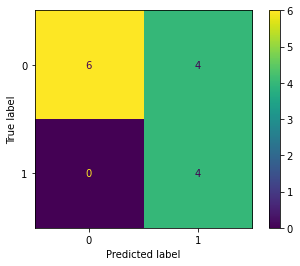

In [47]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc, X_test, y_test)

### SVC with scaling

In [48]:
from sklearn.preprocessing import StandardScaler

# split off end of 2019 as test set
test_size = df.shape[0] - 14
train, test = df.iloc[:test_size], df.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-48-fef320e8d1ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-48-fef320e8d1ef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


In [49]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [50]:
y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

test_acc = svc.score(X_test, y_test)
train_acc = svc.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = svc.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = svc.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

Train accuracy: 0.7419962335216572
Test accuracy: 0.5
Train auc: 0.850653409090909
Test auc: 0.65
Train precision: 0.7428571428571429
Test precision: 0.3333333333333333
Train recall: 0.7109375
Test recall: 0.75
F1 score train: 0.7265469061876249
F1 score test: 0.46153846153846156
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.33      0.75      0.46         4

    accuracy                           0.50        14
   macro avg       0.57      0.57      0.50        14
weighted avg       0.67      0.50      0.51        14



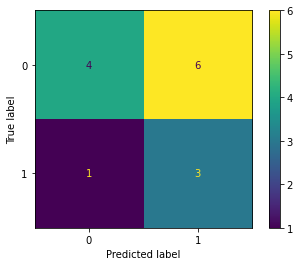

In [51]:
plot_confusion_matrix(svc, X_test, y_test)

## 500+ label

In [52]:
print(df.loc[df['SsMean'] < 500].SsMean.count())
print(df.loc[df['SsMean'] > 500].SsMean.count())

377
168


In [74]:
# create target
# 0 = less than 500
# 1 = over 500

def create_500(data):
    if data < 500:
        return 0
    else:
        return 1

In [75]:
df['label'] = df['SsMean'].apply(create_500)

In [76]:
# create balanced dataset
class_0 = df.loc[df['label']==0]
class_1 = df.loc[df['label']==1]

class_1_sample = class_1.sample(n=377, replace=True)

bdf = pd.concat([class_0, class_1_sample], axis=0)
bdf.sort_values(by='Date', inplace=True)

In [56]:
bdf.shape

(754, 37)

### SVC, scaling, 500+ label

In [77]:
# split off end of 2019 as test set
test_size = bdf.shape[0] - 14
train, test = bdf.iloc[:test_size], bdf.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svc = SVC(probability=True)
svc.fit(X_train, y_train)

<ipython-input-77-20049e3bfc6f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-77-20049e3bfc6f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


SVC(probability=True)

Train accuracy: 0.8216216216216217
Test accuracy: 0.5
Train auc: 0.9178341855368882
Test auc: 0.4489795918367347
Train precision: 0.8233695652173914
Test precision: 0.5
Train recall: 0.8189189189189189
Test recall: 0.14285714285714285
F1 score train: 0.8211382113821137
F1 score test: 0.22222222222222224
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.50      0.14      0.22         7

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.43        14
weighted avg       0.50      0.50      0.43        14



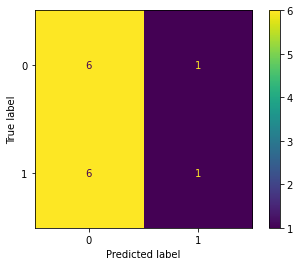

In [78]:
y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

test_acc = svc.score(X_test, y_test)
train_acc = svc.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = svc.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = svc.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

plot_confusion_matrix(svc, X_test, y_test)

### SVC, no scaling, 500+

In [79]:
# split off end of 2019 as test set
test_size = bdf.shape[0] - 30
train, test = bdf.iloc[:test_size], bdf.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

svc = SVC(probability=True)
svc.fit(X_train, y_train)

<ipython-input-79-834a9d9f8da0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-79-834a9d9f8da0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


SVC(probability=True)

Train accuracy: 0.6477900552486188
Test accuracy: 0.6333333333333333
Train auc: 0.7536917617430458
Test auc: 0.7268518518518519
Train precision: 0.7653061224489796
Test precision: 0.7333333333333333
Train recall: 0.4178272980501393
Test recall: 0.6111111111111112
F1 score train: 0.5405405405405406
F1 score test: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.73      0.61      0.67        18

    accuracy                           0.63        30
   macro avg       0.63      0.64      0.63        30
weighted avg       0.65      0.63      0.64        30



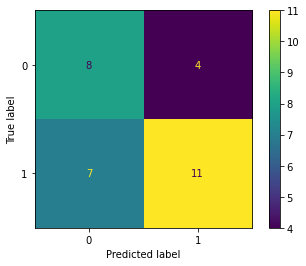

In [80]:
y_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

test_acc = svc.score(X_test, y_test)
train_acc = svc.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = svc.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = svc.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

plot_confusion_matrix(svc, X_test, y_test)

### Logistic Regression

### 250+ label

#### No scaling

In [67]:
from sklearn.linear_model import LogisticRegression

# split off end of 2019 as test set
test_size = df.shape[0] - 14
train, test = df.iloc[:test_size], df.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

lr = LogisticRegression()
lr.fit(X_train, y_train)

<ipython-input-67-78a233d5b2e8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-67-78a233d5b2e8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])
/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

LogisticRegression()

Train accuracy: 0.7024482109227872
Test accuracy: 0.6428571428571429
Train auc: 0.7722017045454546
Test auc: 0.625
Train precision: 0.71875
Test precision: 0.42857142857142855
Train recall: 0.62890625
Test recall: 0.75
F1 score train: 0.6708333333333333
F1 score test: 0.5454545454545454
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.43      0.75      0.55         4

    accuracy                           0.64        14
   macro avg       0.64      0.68      0.63        14
weighted avg       0.73      0.64      0.66        14



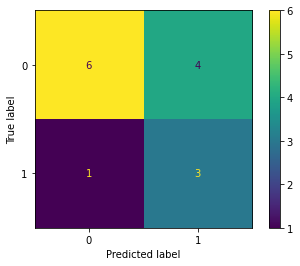

In [68]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

test_acc = lr.score(X_test, y_test)
train_acc = lr.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = lr.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = lr.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

plot_confusion_matrix(lr, X_test, y_test)

#### Scaling

In [70]:
# split off end of 2019 as test set
test_size = df.shape[0] - 14
train, test = df.iloc[:test_size], df.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

<ipython-input-70-ac65d0e0f119>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-70-ac65d0e0f119>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


LogisticRegression()

Train accuracy: 0.7099811676082862
Test accuracy: 0.42857142857142855
Train auc: 0.7872727272727272
Test auc: 0.65
Train precision: 0.7161016949152542
Test precision: 0.3
Train recall: 0.66015625
Test recall: 0.75
F1 score train: 0.6869918699186991
F1 score test: 0.4285714285714285
              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.30      0.75      0.43         4

    accuracy                           0.43        14
   macro avg       0.53      0.53      0.43        14
weighted avg       0.62      0.43      0.43        14



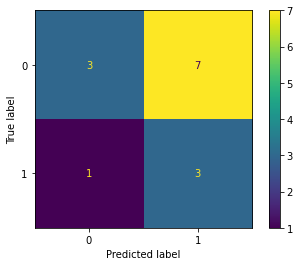

In [71]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

test_acc = lr.score(X_test, y_test)
train_acc = lr.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = lr.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = lr.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

plot_confusion_matrix(lr, X_test, y_test)

### 500+ label

#### no scaling

In [85]:
# split off end of 2019 as test set
test_size = bdf.shape[0] - 14
train, test = bdf.iloc[:test_size], bdf.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

lr = LogisticRegression()
lr.fit(X_train, y_train)

<ipython-input-85-ec6373f25d8e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-85-ec6373f25d8e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])
/Users/reneehall/opt/anaconda3/envs/lighthouse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

LogisticRegression()

Train accuracy: 0.7418918918918919
Test accuracy: 0.42857142857142855
Train auc: 0.8281081081081081
Test auc: 0.4285714285714286
Train precision: 0.752112676056338
Test precision: 0.3333333333333333
Train recall: 0.7216216216216216
Test recall: 0.14285714285714285
F1 score train: 0.736551724137931
F1 score test: 0.2
              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.33      0.14      0.20         7

    accuracy                           0.43        14
   macro avg       0.39      0.43      0.38        14
weighted avg       0.39      0.43      0.38        14



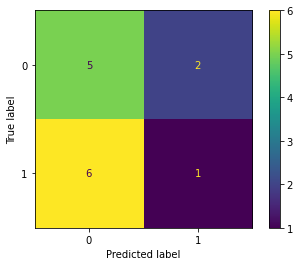

In [86]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

test_acc = lr.score(X_test, y_test)
train_acc = lr.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = lr.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = lr.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

plot_confusion_matrix(lr, X_test, y_test)

#### scaling

In [87]:
# split off end of 2019 as test set
test_size = bdf.shape[0] - 14
train, test = bdf.iloc[:test_size], bdf.iloc[test_size:]

# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

X_train, X_test = train.drop(labels=['SsMean','logSsMean', 'label'], axis=1), test.drop(labels=['SsMean','logSsMean','label'], axis=1)
y_train, y_test = train.label, test.label

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

<ipython-input-87-070c108627a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-87-070c108627a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


LogisticRegression()

Train accuracy: 0.7756756756756756
Test accuracy: 0.5
Train auc: 0.8511029948867787
Test auc: 0.5714285714285714
Train precision: 0.7833333333333333
Test precision: 0.5
Train recall: 0.7621621621621621
Test recall: 0.7142857142857143
F1 score train: 0.7726027397260273
F1 score test: 0.588235294117647
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.50      0.71      0.59         7

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.48        14
weighted avg       0.50      0.50      0.48        14



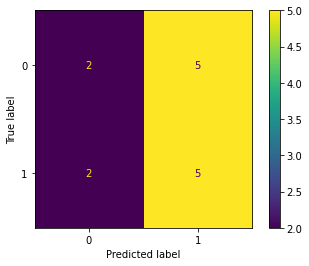

In [88]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

test_acc = lr.score(X_test, y_test)
train_acc = lr.score(X_train, y_train)
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

train_probs = lr.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_train,train_probs)
print('Train auc:', train_auc)
test_probs = lr.predict_proba(X_test)[:,1]
test_auc = roc_auc_score(y_test,test_probs)
print('Test auc:', test_auc)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_pred)
print('Train precision:', train_precision)
print('Test precision:', test_precision)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_pred)
print('Train recall:', train_recall)
print('Test recall:', test_recall)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_pred)
print('F1 score train:', train_f1)
print('F1 score test:', test_f1)

cr = classification_report(y_test,y_pred)
print(cr)

plot_confusion_matrix(lr, X_test, y_test)